<a href="https://colab.research.google.com/github/Lidiia-Afanasieva/NarutoLocalisation/blob/main/NarutoLocalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from zmq.constants import QUEUE
import numpy as np
import cv2 as cv
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [ ]:
# define a video capture object
vid = cv.VideoCapture("/content/Naruto_more_cutted.mp4")

timer = 3

while(timer != 0):
      
    ret, frame = vid.read()  # Take each frame
    
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)  # Convert BGR to HSV

    # upper_orange = np.array([3, 39, 35])  # define range of orange color in HSV
    # lower_orange = np.array([15, 31, 51])

    # ORANGE_MIN = np.array([3, 39, 35])  # more noised version
    ORANGE_MIN = np.array([3, 59, 55])
    ORANGE_MAX = np.array([25, 255, 255])

    BLUE_MIN = np.array([46, 60, 60])  # firstly was about blue color in N
    BLUE_MAX = np.array([255, 100, 100])

    COLOR_MIN = ORANGE_MIN
    COLOR_MAX = ORANGE_MAX

    mask_Naruto = cv.inRange(hsv, COLOR_MIN, COLOR_MAX)  # Threshold the HSV image to get only blue colors

    # COLOR_MIN = BLUE_MIN
    # COLOR_MAX = BLUE_MAX

    # mask_b = cv.inRange(hsv, COLOR_MIN, COLOR_MAX)  # Threshold the HSV image to get only blue colors

    # mask = (mask_o + mask_b)
    # mask = mask.clip(0, 255).astype("uint8")

    MASK = mask_Naruto

    res = cv.bitwise_and(frame,frame, mask= MASK)

    # Treshholding for less noise
    blur = cv.GaussianBlur(MASK,(5,5),0)
    ret,th_mask = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

    cv2_imshow(frame)
    cv2_imshow(th_mask)
    cv2_imshow(res)
      
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
    
    timer -= 1
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv.destroyAllWindows()

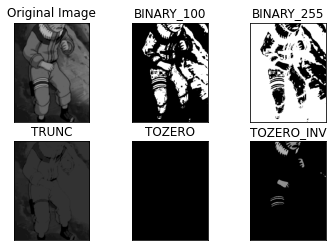

In [ ]:
#  Tresholding types

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/naruto_full_orange.png',0)

ret,thresh1 = cv.threshold(img,100,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,100,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,50,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,200,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO)

titles = ['Original Image','BINARY_100','BINARY_255','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

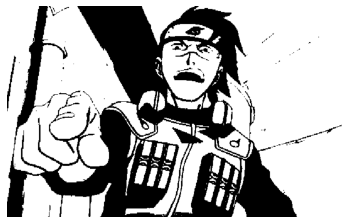

In [ ]:
#  Typess of cool tresholding

img = cv.imread('/content/cool_cock.png',0)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
image = th1

plt.subplot()
plt.axis('off')
plt.imshow(image, 'gray')
plt.savefig('cool_cock_treshold')
plt.show()

In [ ]:

img_size = 8

img = cv.imread('/content/cool_cock.png',0)
cv.resize(img, dsize=(img_size, img_size))

plt.subplot()
plt.imshow(img)
plt.show()

In [ ]:
#  Flood filling if mask

im = cv2.imread("/content/pusy.png")
h,w,chn = im.shape
seed = (w//2,h//2)

mask = np.zeros((h+2,w+2),np.uint8)

floodflags = 4
floodflags |= cv2.FLOODFILL_MASK_ONLY
floodflags |= (255 << 8)

num,im,mask,rect = cv2.floodFill(im, mask, seed, (255,0,0), (10,)*3, (10,)*3, floodflags)

cv2_imshow(mask)

In [ ]:
#  Canny edge detection

img = cv2.imread("/content/сutted_naruto.png")

t_lover = 100
t_upper = 200
aperture_size = 3

edges = cv.Canny(img,t_lover,t_upper,
                 apertureSize=aperture_size, 
                 L2gradient=True)

cv2_imshow(img)
cv2_imshow(edges)
plt.show()

In [ ]:
#  Gaus Pyramide

img = cv2.imread("/content/сutted_naruto.png")
gaus_pyr = cv2.pyrDown(img)

cv2_imshow(gaus_pyr)

for i in range(50):
    gaus_pyr = cv2.pyrDown(gaus_pyr)
    cv2_imshow(gaus_pyr)


In [ ]:
#  Contours founding

image = cv.imread('/content/cool_cock_treshold.png')

cv2.waitKey(0)

imageg = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imageg, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# print(with_counter.shape)
print("Number of Contours found = " + str(len(contours)))
cv2_imshow(thresh)
cv2.waitKey(0)

print(cv.isContourConvex(contours[0]))

for item in contours:

    #  drawing of all contours growing 
    cv2.drawContours(image, item, -1, (0, 0, 255), 5)

    #  finding if the contour's curve is convex
    print(cv.isContourConvex(item))

    cv2_imshow(image)
    cv2.waitKey(0)
    print('???')

cv2.waitKey(0)
cv2.destroyAllWindows()

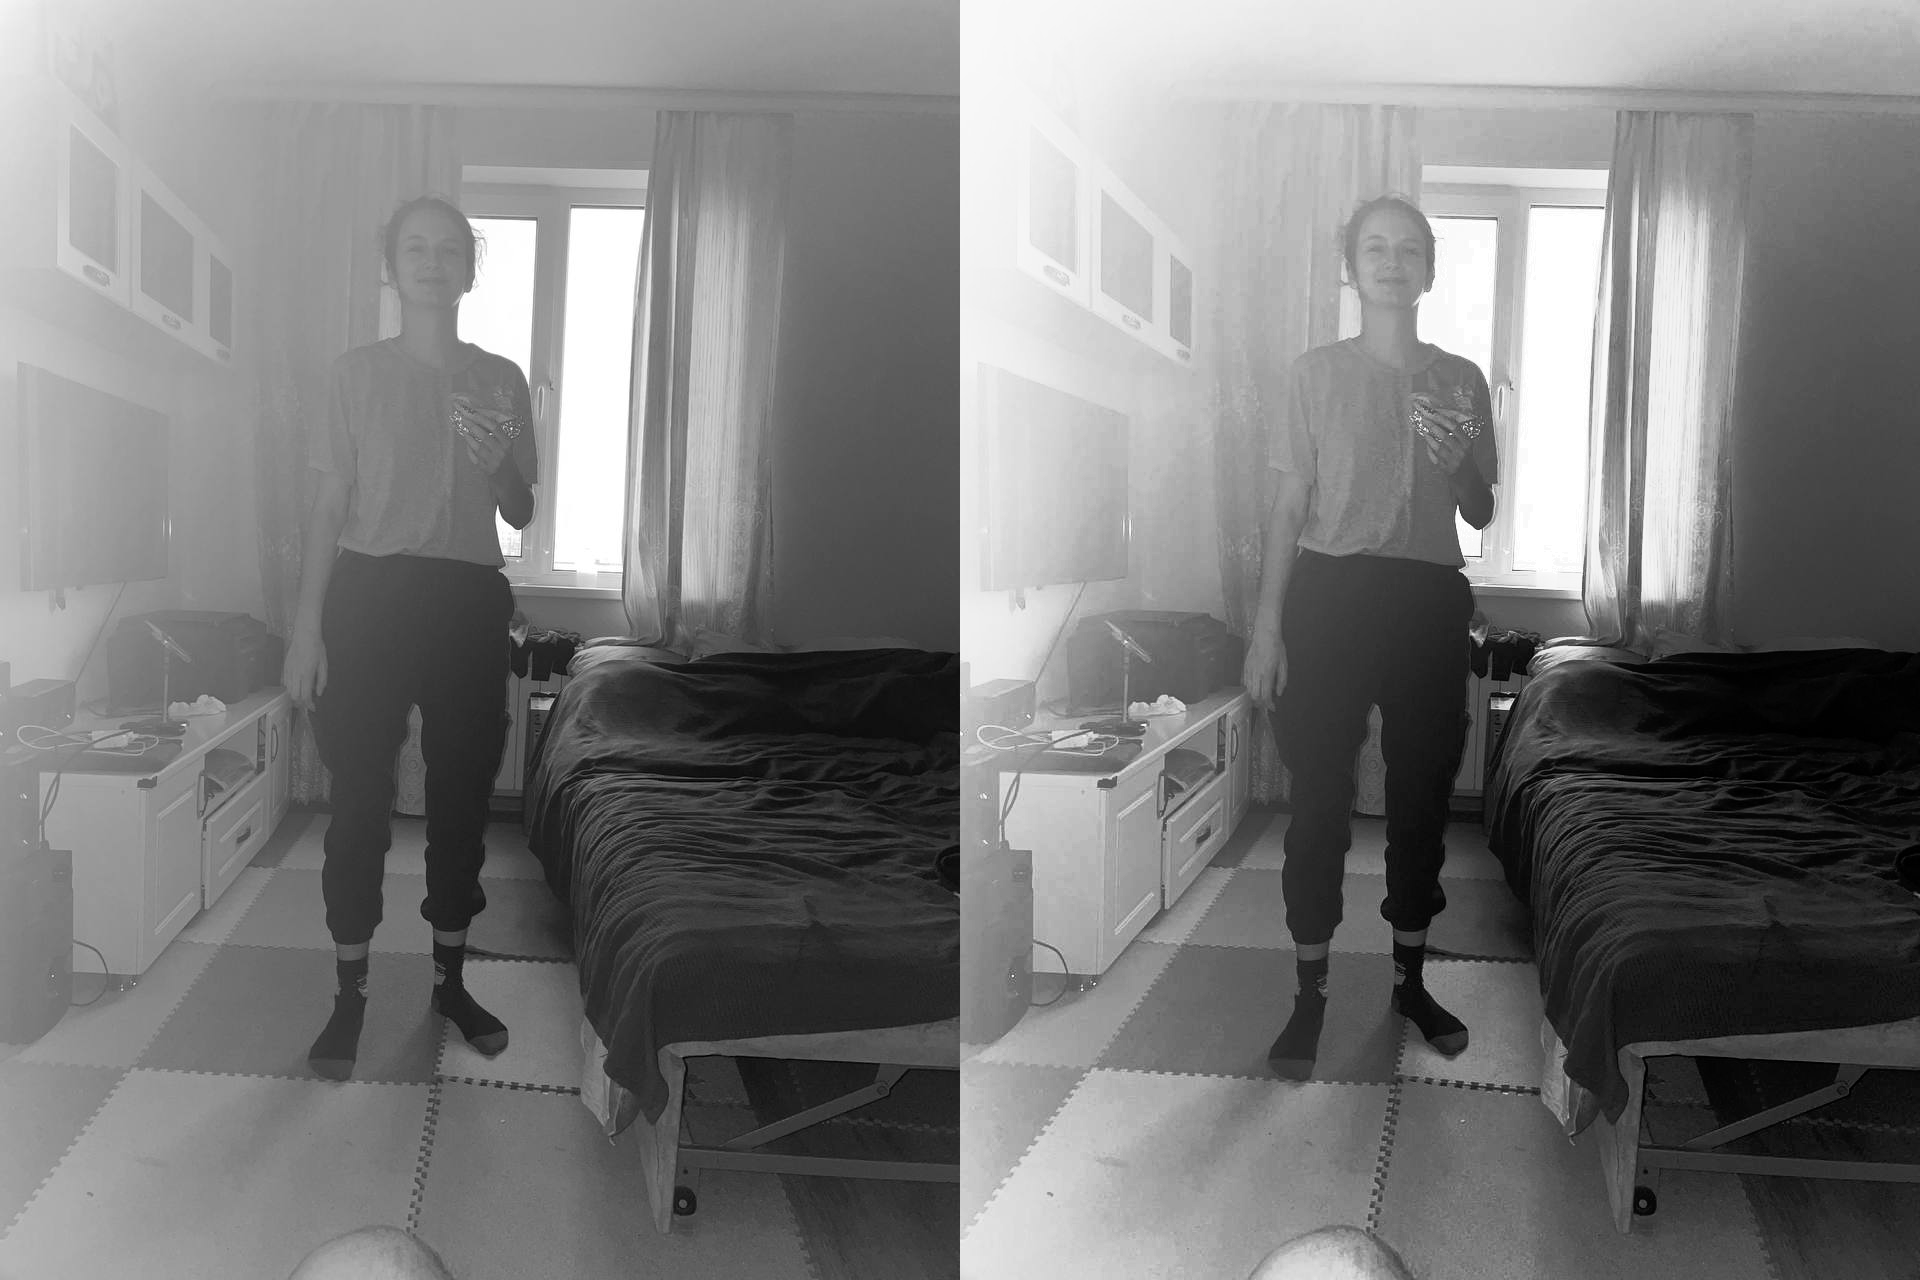

In [ ]:
# Image equalization 1d

img = cv.imread('/content/pusy.png', 0)

equ = cv.equalizeHist(img)

res = np.hstack((img,equ)) #stacking images side-by-side

cv2_imshow(res)

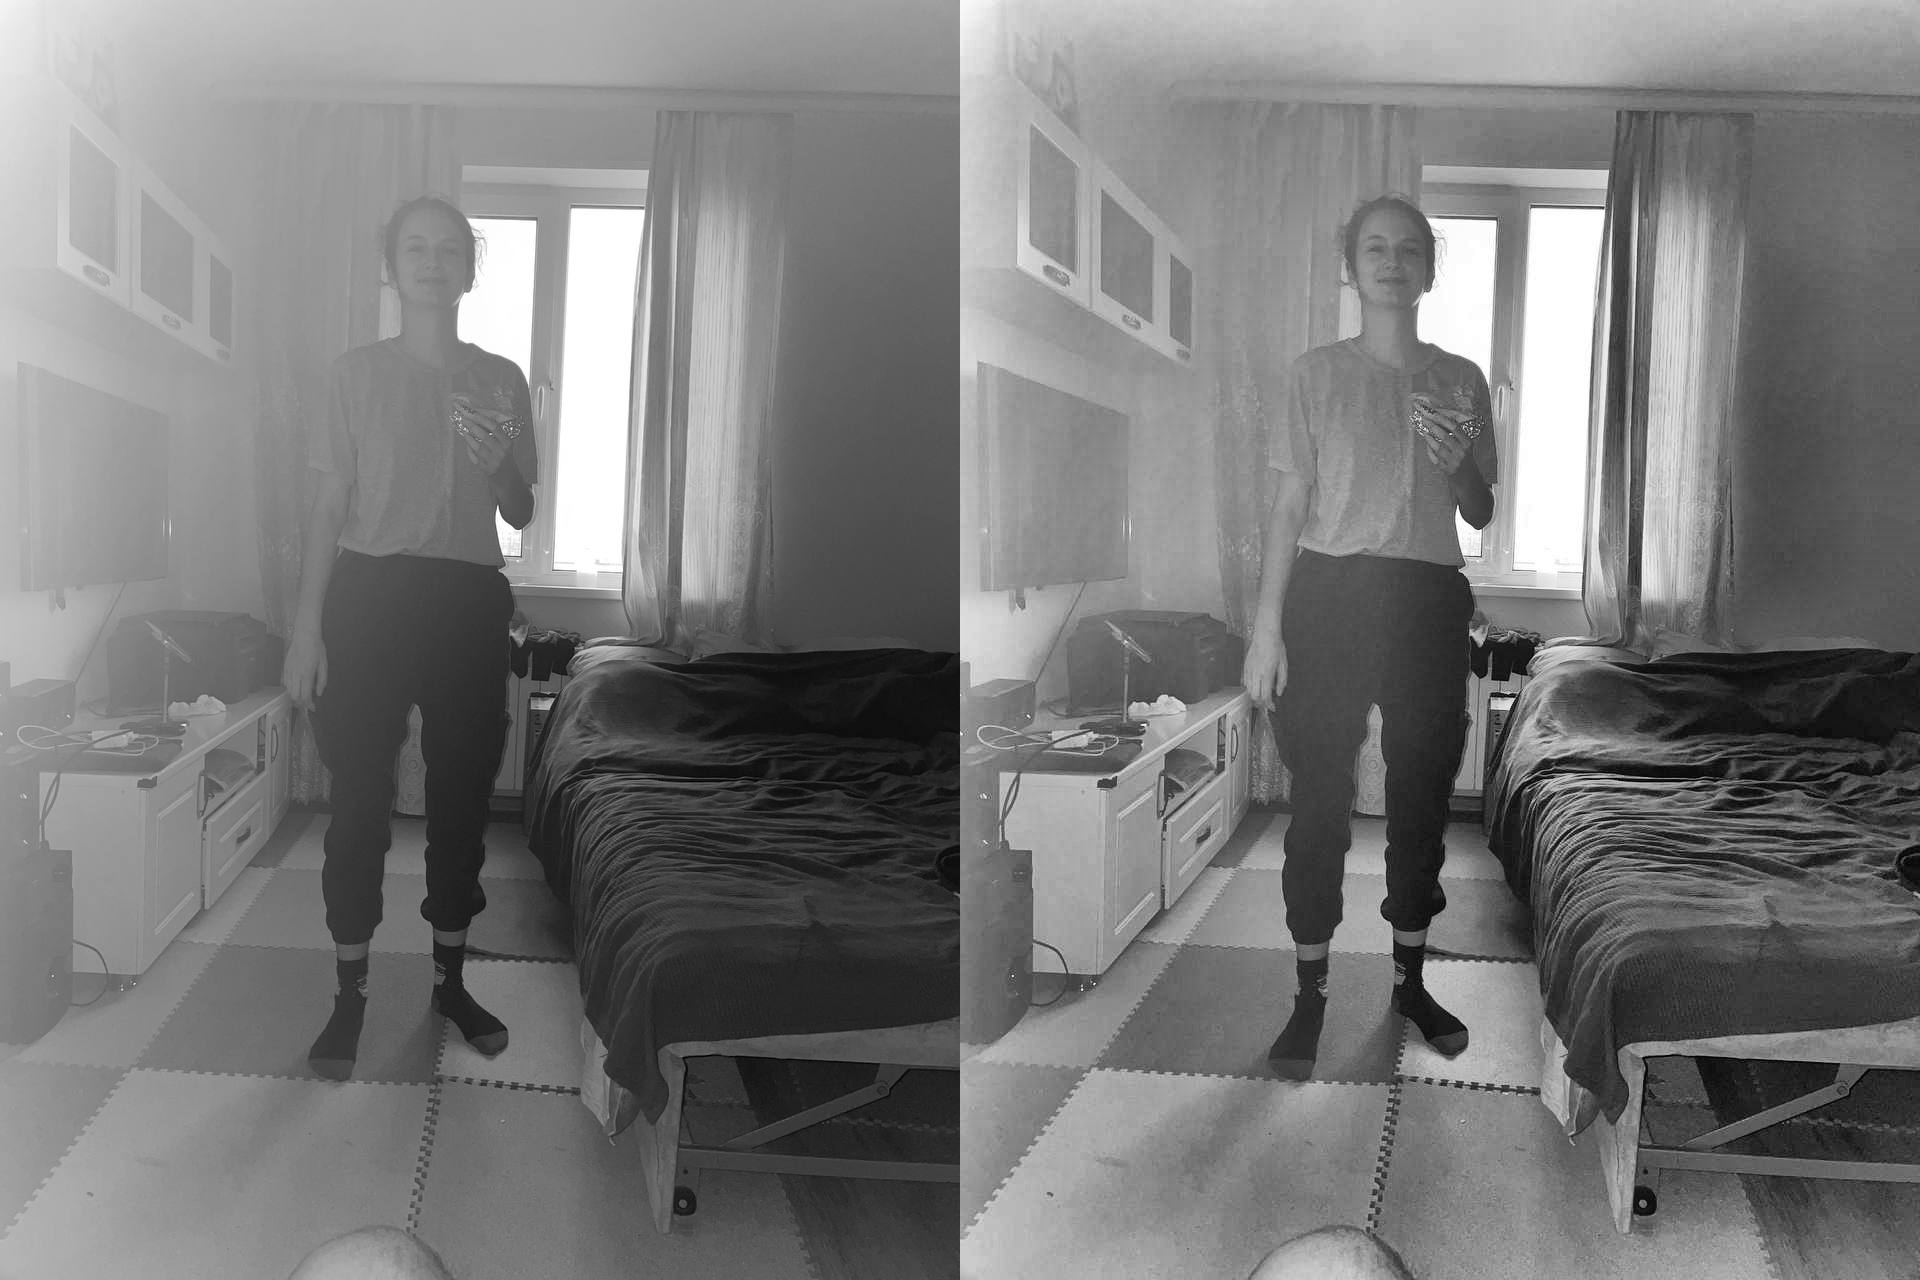

In [ ]:
#  CLAHE 1d

img = cv.imread('/content/pusy.png', 0)

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_cock = clahe.apply(img)

res = np.hstack((img,clahe_cock)) #stacking images side-by-side

cv2_imshow(res)


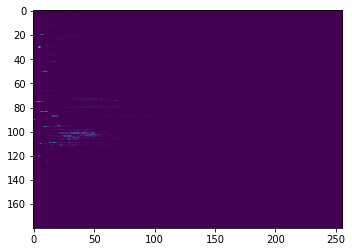

In [ ]:
img = cv.imread('/content/pusy.png')
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist = cv.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
plt.imshow(hist,interpolation = 'nearest')
plt.show()

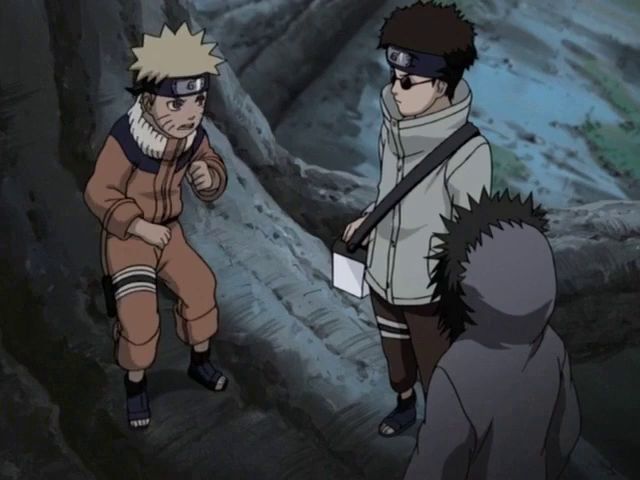

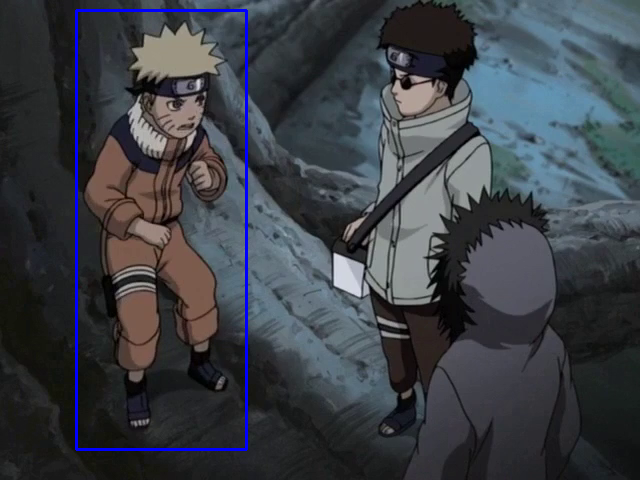

In [5]:
# Template matching of thirst shot

vid = cv.VideoCapture("/content/Naruto_more_cutted.mp4")

timer = 1

while(timer != 0):

    ret, img_rgb = vid.read()  # Take each frame

    cv2_imshow(img_rgb)

    img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
    template = cv.imread('/content/only_naruto.png')
    template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    
    # template = cv2.pyrDown(template)

    # print(img_gray.shape)  # debag
    # print(template.shape)  # debag

    w, h = template.shape[::-1]

    res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_rgb,top_left, bottom_right, 255, 2)

    cv2_imshow(img_rgb)

    if cv.waitKey(1) & 0xFF == ord('q'):
        break
    
    timer -= 1
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv.destroyAllWindows()